# Simulating dendrites

In [ ]:
#@markdown # Install NEURON Simulator
!pip install neuron --quiet  # install neuron simulator

     |████████████████████████████████| 8.7MB 7.0MB/s 


In [ ]:
#@markdown ## Make nice plots!
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "font.size": 18,
    })

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.major.size'] = 7

## Exercise 1a: How inputs propagate to the soma and how inputs interact.

In this exercise we will see how inputs attenuate towards the soma. Also we will see how inputs integrate in a dendritic branch. 

In [ ]:
from neuron import h, gui

# Simulation parameters	
h.tstop = 100        # ms
h.dt = 0.1           # ms
h.steps_per_ms = 10  # For plotting-should be compatible with dt
h.v_init = -65       # mV

### Create a soma and two dendrites, define their anatomical and biophysical properties and connect them

In [ ]:
soma = h.Section(name='soma')
dend0, dend1 = [h.Section(name=n) for n in ['dend0', 'dend1']]

# Define properties of soma
soma.diam = 20  # um
soma.L = 200    # um
soma.Ra = 100   # Axial resistance in Ohm * cm
soma.cm = 1     # specific membrane capacitance, uF/cm^2   
soma.nseg = 1   # number of segments	

# Insert the hh channels (inluding leak)
soma.insert('hh')
for seg in soma: 
  seg.hh.gnabar = 0.12  # Sodium conductance in S/cm^2
  seg.hh.gkbar = 0.036  # Potassium conductance in S/cm^2
  seg.hh.gl = 0.0003    # Leak conductance in S/cm^2
  seg.hh.el = -65       # Reversal potential in mV

# Define properties of dend0
dend0.diam = 5   # um
dend0.L = 500    # um
dend0.nseg = 11  # number of segments
dend0.cm = 1     # uF/cm^2
dend0.Ra = 100   # Ohm * cm

# Insert passive (leak) channels
dend0.insert('pas')      
for seg in dend0:
  seg.pas.e = -65     # mV 
  seg.pas.g = 0.0003  # S/cm^2
	
# Define properties of dend1
dend1.diam = 3   # um
dend1.L = 200    # um
dend1.nseg = 13  # number of segments
dend1.cm = 1     # uF/cm^2
dend1.Ra = 100   # Ohm * cm

# Insert passive (leak) channels
dend1.insert('pas')
for seg in dend0:
  seg.pas.e = -65     # mV 
  seg.pas.g = 0.0003  # S/cm^2

# Connect the 0 point of dendrite 0 to the zero point of the soma
dend0.connect(soma(0), 0)       
dend1.connect(dend0(1), 0)

dend1

### Synaptic Stimulation

In [ ]:
# Place the synapse to the middle (0.5) of the soma, ...
Syn = h.ExpSyn(soma(0.5))
Syn.e = 0  # Reverse potential of the synapse, mV

#...create an artificial spike (an "event" to be delivered to the synapse)...
ns = h.NetStim(0.5)
ns.start = 50  # ms
ns.number = 1

#... and connect the event to the synapse.
nc = h.NetCon(ns, Syn, -10, 2, 0.008*1)

### Example simulation

Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (`dend[1]`)

Somatic absolute change is 0.5 mV
Distal Dendritic absolute change is 0.14 mV


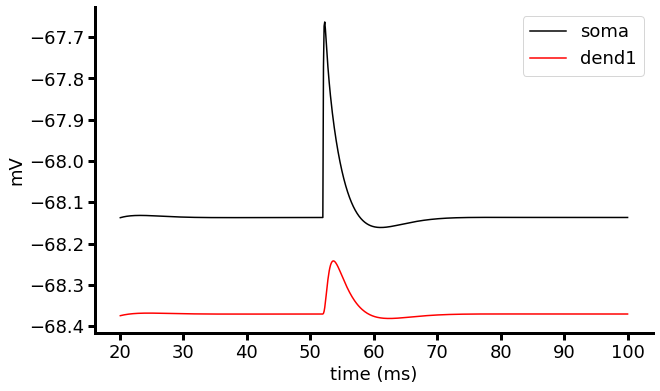

In [ ]:
vsoma_vec = h.Vector()   # Membrane potential vector
vdend1_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()       # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

# Run the simulation
h.run()

vsoma_vec.remove(0, 200)
vdend1_vec.remove(0, 200)
t_vec.remove(0, 200)

plt.figure(figsize=(10, 6))
plt.plot(t_vec, vsoma_vec, color='black', label='soma')
plt.plot(t_vec, vdend1_vec, color='red', label='dend1')
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.legend()

print (f'Somatic absolute change is {round(vsoma_vec.max() - vsoma_vec.min(), 2)} mV')
print (f'Distal Dendritic absolute change is {round(vdend1_vec.max() - vdend1_vec.min(), 2)} mV')

### Task 1: How can you easily make this synapse inhibitory?

In [ ]:
# Place the synapse to the middle (0.5) of the soma, ...
Syn.e = ...  # Reverse potential of the synapse, mV

In [ ]:
#@markdown # Run Simulation
vsoma_vec = h.Vector()   # Membrane potential vector
vdend1_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()       # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

# Run the simulation
h.run()

vsoma_vec.remove(0, 200)
vdend1_vec.remove(0, 200)
t_vec.remove(0, 200)

plt.figure(figsize=(10, 6))
plt.plot(t_vec, vsoma_vec, color='black', label='soma')
plt.plot(t_vec, vdend1_vec, color='red', label='dend1')
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.legend()


print ('Somatic absolute change is ', round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Distal Dendritic absolute change is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')

Somatic absolute change is  0.09  mV
Distal Dendritic absolute change is 0.02 mV


### Task 2: Move the synapse to the middle of `dend1` section.

What do you expect for the amplitude and the duration of the EPSP seen at the soma?

In [ ]:
# Place the synapse to the middle (0.5) of the dend1
Syn = ...
Syn.e = 0  # Reverse potential of the synapse, mV

#...create an artificial spike (an "event" to be delivered to the synapse)...
ns = h.NetStim(0.5)
ns.start = 50  # ms
ns.number = 1  

#... and connect the event to the synapse.
nc = h.NetCon(ns, Syn, -10, 2, 0.008*1)

Somatic absolute change is  0.13  mV
Distal Dendritic absolute change is 3.2 mV


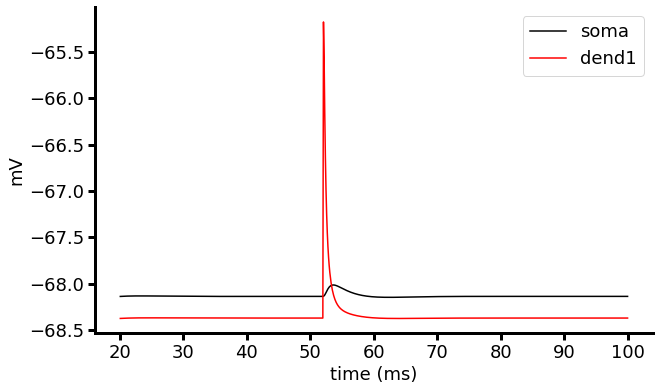

In [ ]:
#@markdown # Run Simulation
vsoma_vec = h.Vector()   # Membrane potential vector
vdend1_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()       # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

# Run the simulation
h.run()

vsoma_vec.remove(0, 200)
vdend1_vec.remove(0, 200)
t_vec.remove(0, 200)

plt.figure(figsize=(10, 6))
plt.plot(t_vec, vsoma_vec, color='black', label='soma')
plt.plot(t_vec, vdend1_vec, color='red', label='dend1')
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.legend()


print ('Somatic absolute change is ', round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Distal Dendritic absolute change is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')

### Every input for itself (the passive dendritic tree)

![picture](https://drive.google.com/uc?id=1b0juXyFyc6mJUH_uMWcDtcdNENb6kEfe)

### Task 3: Insert 1 to 5 synapses like this one in the same location. In this case, this is equivalent to increasing the weight 1 to 5 times.

- What is the expected (arithmetic sum) versus actual (simulated output)?
- Is their relationship linear? 

[0.13, 0.26, 0.39, 0.52, 0.65]
[0.13, 0.26, 0.37, 0.48, 0.58]


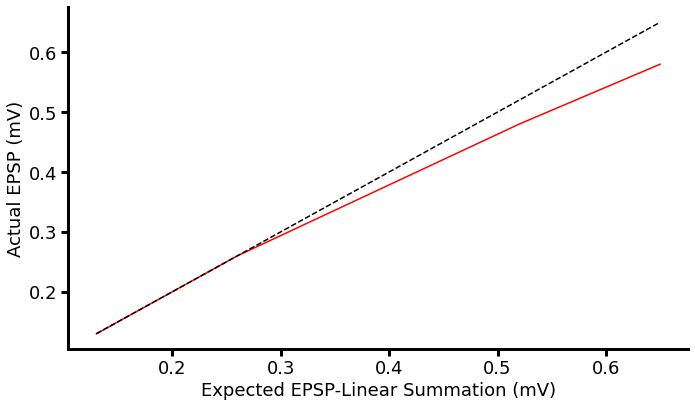

In [ ]:
# Solution

# YOUR CODE GOES HERE
# Solution

[Check the solution here](https://bitbucket.org/spiros1776/comneurolecture/src/main/CompNeuro_Dendrites_2021/Examples/Exc_1a_solution.py)

### Driving force

![picture](https://drive.google.com/uc?id=1yiN55q8cifdt_EChOFuyKQGfUvuRpuiq)